# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
from authpy import authpy

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = '.'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
api = authpy('Project2_Cred_Twitter_API.json')

In [17]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [28]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write(',\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Fail
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Fail
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8380839

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [ ]:
with open('tweet_json.txt', "r+") as file:
    readcontent = file.read()
    file.seek(0, 0)
    file.write("[")
    file.write(readcontent)
os.system("sed -i '$ s/.$//' tweet_json.txt")
os.system("sed -i '$ s/.$/}]/' tweet_json.txt")

In [5]:
df = pd.read_json('tweet_json.txt', orient='records')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2323 non-null   datetime64[ns, UTC]
 1   id                             2323 non-null   int64              
 2   id_str                         2323 non-null   int64              
 3   full_text                      2323 non-null   object             
 4   truncated                      2323 non-null   bool               
 5   display_text_range             2323 non-null   object             
 6   entities                       2323 non-null   object             
 7   extended_entities              2053 non-null   object             
 8   source                         2323 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [6]:
df_tweet = df[['id', 'retweet_count', 'favorite_count']]
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,6859,32856
1,892177421306343426,5169,28380
2,891815181378084864,3410,21329
3,891689557279858688,7072,35814
4,891327558926688256,7576,34244


In [7]:
img_prediction = pd.read_table('image-predictions.tsv')
img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1528,789137962068021249,https://pbs.twimg.com/media/CvOUw8vWYAAzJDq.jpg,2,Chihuahua,0.746135,True,Pekinese,0.070383,True,Pembroke,0.049237,True
154,668779399630725120,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,1,Chesapeake_Bay_retriever,0.285508,True,Weimaraner,0.146832,True,black-footed_ferret,0.060865,False
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,0.382234,True,chow,0.208302,True,sunglasses,0.131328,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [55]:
img_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [56]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [58]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
997,748324050481647620,NaN,NaN,2016-06-30 01:15:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748324050...,11,10,Duke,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
1891,674764817387900928,NaN,NaN,2015-12-10 01:37:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups are masters of camouflage. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674764817...,10,10,None,None,None,None,None
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10,10,Remy,None,None,None,None
1878,675047298674663426,NaN,NaN,2015-12-10 20:19:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a fluffy albino Bacardi Columbia mix. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675047298...,11,10,a,None,None,None,None


In [59]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [60]:
twitter_archive[twitter_archive['in_reply_to_status_id'] == 6.715449e+17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
twitter_archive['in_reply_to_status_id'].value_counts()

6.671522e+17    2
6.715449e+17    1
7.030419e+17    1
6.747400e+17    1
8.116272e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [62]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [63]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [64]:
twitter_archive[twitter_archive.tweet_id == 8.406323e+17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [65]:
twitter_archive[twitter_archive.name == 'Baloo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
594,798705661114773508,NaN,NaN,2016-11-16 01:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Baloo. He's expecting a fa...,7.406770e+17,4.196984e+09,2016-06-08 22:48:46 +0000,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None
1067,740676976021798912,NaN,NaN,2016-06-08 22:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None


In [66]:
twitter_archive[twitter_archive.tweet_id == 698710712454139905].source

1414    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [67]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [68]:
twitter_archive[['rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,rating_numerator,name,doggo,floofer,pupper,puppo
1263,11,None,None,None,pupper,None
1576,10,Kramer,None,None,None,None
1074,12,Simba,None,None,None,None
123,14,Walter,None,None,None,None
303,13,Buddy,None,None,None,None


In [147]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [148]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [150]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [149]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [239]:
twitter_archive['tweet_id'].count()

2356

In [240]:
img_prediction['tweet_id'].count()

2075

In [241]:
df_tweet['id'].count()

2323

In [69]:
df_tweet.sample(5)

,id,retweet_count,favorite_count
143,863062471531167744,2040,7303
1316,704347321748819968,305,1407
1225,710296729921429505,657,2139
1265,707776935007539200,851,2933
2093,670338931251150849,96,366


In [70]:
df_tweet[ df_tweet.id.duplicated()]

,id,retweet_count,favorite_count


In [71]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2323 non-null   int64
 1   retweet_count   2323 non-null   int64
 2   favorite_count  2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [72]:
all_columns = pd.Series(list(twitter_archive) + list(img_prediction) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues
1. tweeter_archive table - NaN (Null) values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, expanded_urls columns 

2. tweeter_archive table - Null values replaced by None in doggo, floofer, pupper, puppo; name column sometimes has value 'a'

3. tweeter_archive table - timestamp and retweeted_status_timestamp columns are object(string) type not datetime

4. tweeter_archive, df_tweet tables - some tweet_id has no image in img_prediction table

5. tweeter_archive table - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id columns have float type instead of object; tweet_id column has int type, instead of object

6. img_prediction table - for image number 4, there is no properties(p4, p4_conf, p4_dog)

7. twitter_archive table -  some tweet_id have dog image with multiple dog stages

8. img_prediction table - some tweet_id have not a dog img (p1_dog, p2_dog, p3_dog are False)

### Tidiness issues
1. tweet_id column(which is in img_prediction table) is duplicated in df_tweet and twitter_archive tables

2. twitter_archive table - the dog_stage variable is hidden in column headers: doggo, floofer, pupper, puppo 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [8]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
img_prediction_clean = img_prediction.copy()
df_tweet_clean = df_tweet.copy()

### Issue #1:  
tweeter_archive: NaN (Null) values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, expanded_urls columns

#### Define:
Drop rows where expanded_urls misses, replace all missing id by 0, replace missing retweeted_status_timestamp values by 2099-12-31 00:00:00 +0000

#### Code

In [9]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notna()]

In [10]:
twitter_archive_clean['retweeted_status_id'].fillna(0, inplace=True)
twitter_archive_clean['retweeted_status_user_id'].fillna(0, inplace=True)
twitter_archive_clean['retweeted_status_timestamp'].fillna('2099-12-31 00:00:00 +0000', inplace=True)
twitter_archive_clean['in_reply_to_status_id'].fillna(0, inplace=True)
twitter_archive_clean['in_reply_to_user_id'].fillna(0, inplace=True)

#### Test

In [11]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       2297 non-null   float64
 2   in_reply_to_user_id         2297 non-null   float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         2297 non-null   float64
 7   retweeted_status_user_id    2297 non-null   float64
 8   retweeted_status_timestamp  2297 non-null   object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

### Issue #2:
tweeter_archive: Null values replaced by None in doggo, floofer, pupper, puppo columns; name column sometimes has value a non-dog name like 'the', 'just', 'a'

#### Define
* In doggo, floofer, pupper, puppo columns, replace None by 0
* Delete all rows which have a lowercase value name(non-dog name) in name column

#### Code

In [30]:
twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'None', 'doggo'] = '0'
twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'None', 'pupper'] = '0'
twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'None', 'puppo'] = '0'
twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'None', 'floofer'] = '0'

Delete all rows which have a lowercase value name(non-dog name) in name column

In [137]:
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean['name'].str.islower())]

#### Test

In [529]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [530]:
twitter_archive_clean[twitter_archive_clean['pupper'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [531]:
twitter_archive_clean[twitter_archive_clean['puppo'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [532]:
twitter_archive_clean[twitter_archive_clean['floofer'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [33]:
twitter_archive_clean[twitter_archive_clean['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:
tweeter_archive table: timestamp and retweeted_status_timestamp columns are object(string) type not datetime

#### Define
Convert type of timestamp and retweeted_status_timestamp columns into datetime

#### Code

In [14]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp']= pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

#### Test

In [535]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   int64              
 1   in_reply_to_status_id       2297 non-null   float64            
 2   in_reply_to_user_id         2297 non-null   float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         2297 non-null   float64            
 7   retweeted_status_user_id    2297 non-null   float64            
 8   retweeted_status_timestamp  2297 non-null   datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

### Issue #4:
tweeter_archive, df_tweet tables: some tweet_id has no image in img_prediction

##### Define
1. Filter id (in df_tweet table) which exist in img_prediction table
2. Filter tweet_id(in twitter_archive table) which exist in img_prediction table
3. Delete rows and columns for retweet in twitter_archive_clean table

##### Code

In [15]:
tweet_id_img = img_prediction_clean['tweet_id'].to_numpy()
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(tweet_id_img)]
df_tweet_clean = df_tweet_clean.loc[df_tweet_clean['id'].isin(tweet_id_img)]

In [34]:
tweet_ids = df_tweet_clean['id'].to_numpy()
img_prediction_clean = img_prediction_clean.loc[img_prediction_clean['tweet_id'].isin(tweet_ids)]

Remove all rows for retweet in twitter_archive_clean

In [20]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

Remove retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [27]:
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
                           , inplace =True)

##### Test

In [538]:
twitter_archive_clean['tweet_id'].count()

2053

In [28]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [29]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
173,858471635011153920,0.0,0.0,2017-04-30 00:02:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,https://twitter.com/dog_rates/status/858471635...,13,10,Sophie,0,0,0,0
2228,668256321989451776,0.0,0.0,2015-11-22 02:34:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,0,0,0,0
924,755206590534418437,0.0,0.0,2016-07-19 01:04:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14,10,one,doggo,0,0,0
1659,683098815881154561,0.0,0.0,2016-01-02 01:33:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,https://twitter.com/dog_rates/status/683098815...,12,10,None,0,0,0,0
18,888554962724278272,0.0,0.0,2017-07-22 00:23:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,0,0,0,0


In [539]:
df_tweet_clean['id'].count()

2053

In [35]:
img_prediction_clean['tweet_id'].count()

2053

### Issue #5:
tweet_id column(which is in img_prediction table) is duplicated in df_tweet and twitter_archive tables

##### Define
1. Rename id column to tweet_id in df_tweet table, merge all columns of twitter_archive and img_prediction tables to df_tweet table, joining on tweet_id

##### Code

In [91]:
df_tweet_clean.rename(columns={"id": "tweet_id"}, inplace=True)
twitter_archive_master = pd.merge(pd.merge(twitter_archive_clean, df_tweet_clean,on='tweet_id'),img_prediction_clean,
                                  on='tweet_id')

##### Test

In [92]:
list(twitter_archive_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Issue #6:
twitter_archive: some tweet_id have dog image with multiple dog stages

##### Define
* Replace all values different from '0' by '1' in doggo, floofer, pupper, and puppo columns
* Create multiple_stages column which contain list separated comma of dog stages for such tweet_id

##### Code

* Replace all values different from '0' by '1' in doggo, floofer, pupper, and puppo columns

In [93]:
twitter_archive_master.loc[twitter_archive_master['doggo'] != '0', 'doggo'] = '1'
twitter_archive_master.loc[twitter_archive_master['puppo'] != '0', 'puppo'] = '1'
twitter_archive_master.loc[twitter_archive_master['pupper'] != '0', 'pupper'] = '1'
twitter_archive_master.loc[twitter_archive_master['floofer'] != '0', 'floofer'] = '1'

* Create multiple_stages column which contain list separated comma of dog stages for such tweet_id

In [94]:
twitter_archive_master.loc[(twitter_archive_master['doggo'] == '1') & (twitter_archive_master['puppo'] == '1')&
                           (twitter_archive_master['pupper'] == '0') & (twitter_archive_master['floofer'] == '0'), 
                           'multiple_stages'] = "['1', '1', '0', '0']"
twitter_archive_master.loc[(twitter_archive_master['doggo'] == '1') & (twitter_archive_master['pupper'] == '1'), 
                           'multiple_stages'] = "['1', '0', '1', '0']"
twitter_archive_master.loc[(twitter_archive_master['doggo'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['puppo'] == '0') & (twitter_archive_master['pupper'] == '0'), 
                           'multiple_stages'] = "['1', '0', '0', '1']"
twitter_archive_master.loc[(twitter_archive_master['puppo'] == '1') & (twitter_archive_master['pupper'] == '1')&
                           (twitter_archive_master['doggo'] == '0') & (twitter_archive_master['floofer'] == '0'), 
                           'multiple_stages'] = "['0', '1', '1', '0']"
twitter_archive_master.loc[(twitter_archive_master['puppo'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '0') & (twitter_archive_master['pupper'] == '0'), 
                           'multiple_stages'] = "['0', '1', '0', '1']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '0') & (twitter_archive_master['puppo'] == '0'), 
                           'multiple_stages'] = "['0', '0', '1', '1']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '1') & (twitter_archive_master['puppo'] == '0'), 
                           'multiple_stages'] = "['1', '0', '1', '1']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '1') & (twitter_archive_master['floofer'] == '0')&
                           (twitter_archive_master['doggo'] == '1') & (twitter_archive_master['puppo'] == '1'), 
                           'multiple_stages'] = "['1', '1', '1', '0']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '0') & (twitter_archive_master['puppo'] == '1'), 
                           'multiple_stages'] = "['0', '1', '1', '1']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '0') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '1') & (twitter_archive_master['puppo'] == '1'), 
                           'multiple_stages'] = "['1', '1', '0', '1']"
twitter_archive_master.loc[(twitter_archive_master['pupper'] == '1') & (twitter_archive_master['floofer'] == '1')&
                           (twitter_archive_master['doggo'] == '1') & (twitter_archive_master['puppo'] == '1'), 
                           'multiple_stages'] = "['1', '1', '1', '1']"

##### Test

In [56]:
twitter_archive_master['multiple_stages'].value_counts()

['1', '0', '1', '0']    9
['1', '1', '0', '0']    1
['1', '0', '0', '1']    1
Name: multiple_stages, dtype: int64

### Issue #7:
twitter_archive table: the dog_stage variable is hidden in column headers: doggo, floofer, pupper, puppo 

##### Define
Melt the *doggo, flooter, pupper, puppo* columns to a *dog_stage* column

#### Code

In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2008 non-null   int64              
 1   in_reply_to_status_id  2008 non-null   float64            
 2   in_reply_to_user_id    2008 non-null   float64            
 3   timestamp              2008 non-null   datetime64[ns, UTC]
 4   source                 2008 non-null   object             
 5   text                   2008 non-null   object             
 6   expanded_urls          2008 non-null   object             
 7   rating_numerator       2008 non-null   int64              
 8   rating_denominator     2008 non-null   int64              
 9   name                   2008 non-null   object             
 10  doggo                  2008 non-null   object             
 11  floofer                2008 non-null   object           

In [95]:
id_vars = list(twitter_archive_master)
del id_vars[10]
del id_vars[10]
del id_vars[10]
del id_vars[10]
del id_vars[-1]

In [81]:
id_vars

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [96]:
twitter_archive_master = pd.melt(twitter_archive_master, id_vars = id_vars, var_name='dog_stage', 
                                 value_name='yes_Or_no')

#### Test

In [83]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,yes_Or_no
5126,701952816642965504,0.0,0.0,2016-02-23 02:12:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,https://twitter.com/dog_rates/status/701952816...,11,10,Rilo,...,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True,pupper,0
758,750719632563142656,0.0,0.0,2016-07-06 15:54:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Meyer. He has to hold somebody's hand ...,https://twitter.com/dog_rates/status/750719632...,12,10,Meyer,...,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True,doggo,0
4183,850380195714523136,0.0,0.0,2017-04-07 16:10:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,https://twitter.com/dog_rates/status/850380195...,13,10,Leo,...,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True,pupper,0
9520,676864501615042560,0.0,0.0,2015-12-15 20:40:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's just a head now. Lost his body ...,https://twitter.com/dog_rates/status/676864501...,10,10,Ash,...,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True,multiple_stages,NaN
2723,757597904299253760,0.0,0.0,2016-07-25 15:26:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,https://twitter.com/jon_hill987/status/7575971...,11,10,None,...,0.836106,False,wallet,0.056627,False,purse,0.051333,False,floofer,0


### Issue #8:
tweeter_archive table: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id columns have float type instead of object; tweet_id column has int type instead of object

##### Define
Since retweeted_status_user_id, retweeted_status_id columns have been removed, change type of all **in_reply_to_status_id, in_reply_to_user_id, tweet_id** columns to object

##### Code

In [97]:
convert_dict = {'in_reply_to_status_id': object,
                'in_reply_to_user_id': object,
                'tweet_id': object
                
                }
twitter_archive_master = twitter_archive_master.astype(convert_dict)

##### Test

In [85]:
twitter_archive_master.dtypes

tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                datetime64[ns, UTC]
source                                object
text                                  object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
retweet_count                          int64
favorite_count                         int64
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3                                    object
p3_conf                              float64
p3_dog    

In [86]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,yes_Or_no
1992,666268910803644416,0.0,0.0,2015-11-16 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,10,None,...,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,doggo,0
7729,671538301157904385,0.0,0.0,2015-12-01 03:56:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,...,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False,puppo,0
9843,669749430875258880,0.0,0.0,2015-11-26 05:28:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. Clarence thought he saw...,https://twitter.com/dog_rates/status/669749430...,8,10,Clarence,...,0.245794,False,toilet_seat,0.109420,False,paper_towel,0.105664,False,multiple_stages,NaN
821,743595368194129920,0.0,0.0,2016-06-17 00:05:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Harold. He looks slippery af. Probably...,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,...,0.505675,False,hog,0.370726,False,warthog,0.018827,False,doggo,0
7381,683030066213818368,0.0,0.0,2016-01-01 21:00:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lulu. She's contemplating all her unre...,https://twitter.com/dog_rates/status/683030066...,10,10,Lulu,...,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True,puppo,0


### Issue #9:
img_prediction table : for image number 4, there is no properties(p4, p4_conf, p4_dog)

##### Define
Filter rows with img_num different from 4 in twitter_archive_master table

##### Code

In [98]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['img_num'] != 4]

##### Test

In [88]:
twitter_archive_master[twitter_archive_master['img_num'] == 4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,yes_Or_no


### Issue #10:
img_prediction table: some tweet_id have not a dog img (p1_dog, p2_dog, p3_dog are False)

##### Define
Filter rows with p1_dog, p2_dog and p3_dog are not False in same row

##### Code

In [99]:
twitter_archive_master=twitter_archive_master.loc[~((twitter_archive_master['p3_dog'] == False)&
                                                    (twitter_archive_master['p2_dog'] == False)&
                                                    (twitter_archive_master['p1_dog'] == False))]

##### Test

In [100]:
twitter_archive_master.loc[((twitter_archive_master['p3_dog'] == False)&
                                                    (twitter_archive_master['p2_dog'] == False)&
                                                    (twitter_archive_master['p1_dog'] == False))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,yes_Or_no


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [568]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Proportions of tweet per prediction model

Function to plot pie graph

In [101]:
from matplotlib import pyplot as plt
def pie_plot(data, labels):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    ax.pie(data, labels = labels,autopct='%1.2f%%')
    plt.show()

Count number of rows from df_tweet_clean table for each img_num

In [102]:
im1 = len(twitter_archive_master[twitter_archive_master['img_num']==1].index)
im2 = len(twitter_archive_master[twitter_archive_master['img_num']==2].index)
im3 = len(twitter_archive_master[twitter_archive_master['img_num']==3].index)
data = [im1, im2, im3]
labels = ['img_num_1','img_num_2','img_num_3']

Plot graph of proportions of tweet by image number

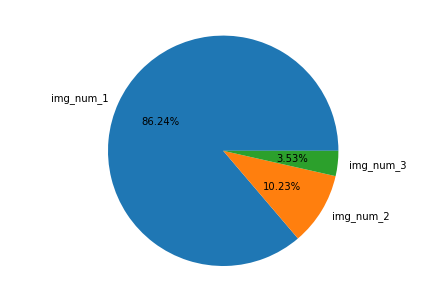

In [103]:
pie_plot(data, labels);

**P1** is more reliable for image prediction

### Proportion of tweet per dog stage

In [107]:
twitter_archive_master['yes_Or_no'].value_counts()

0                       6420
1                        264
['1', '0', '1', '0']       8
['1', '0', '0', '1']       1
['1', '1', '0', '0']       1
Name: yes_Or_no, dtype: int64

Count rows from twitter_archive_clean table for each dog stage 

In [108]:
nb_doggo = len(twitter_archive_master.loc[(twitter_archive_master['yes_Or_no']=='1')&
                                          (twitter_archive_master['dog_stage']=='doggo')].index)
nb_pupper = len(twitter_archive_master[(twitter_archive_master['yes_Or_no']=='1')&
                                      (twitter_archive_master['dog_stage']=='pupper')].index)
nb_floofer = len(twitter_archive_master[(twitter_archive_master['yes_Or_no']=='1')&
                                       (twitter_archive_master['dog_stage']=='floofer')].index)
nb_puppo = len(twitter_archive_master[(twitter_archive_master['yes_Or_no']=='1')&
                                     (twitter_archive_master['dog_stage']=='puppo')].index)
data = [nb_doggo+10, nb_pupper+8, nb_floofer+1, nb_puppo+1]
labels = ['dogger', 'pupper', 'floofer', 'puppo']

Plot graph which show each proportion  of tweets by dog stage

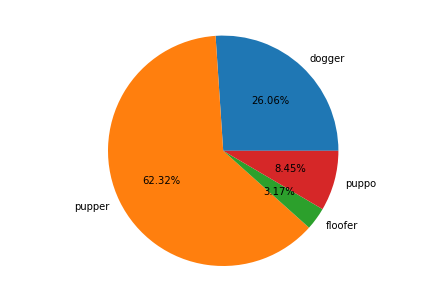

In [109]:
pie_plot(data, labels);

**Pupper** dog stage is more predominant

### Description of retweet_count and favorite_count per dog stage

Extract rows from twitter_archive_master table for each dog stage

In [113]:
doggo_tweet_id = twitter_archive_master[(twitter_archive_master['dog_stage']=='doggo')&(twitter_archive_master['yes_Or_no']=='1')]['tweet_id'].to_numpy()
puppo_tweet_id = twitter_archive_master[(twitter_archive_master['dog_stage']=='puppo')&(twitter_archive_master['yes_Or_no']=='1')]['tweet_id'].to_numpy()
pupper_tweet_id = twitter_archive_master[(twitter_archive_master['dog_stage']=='pupper')&(twitter_archive_master['yes_Or_no']=='1')]['tweet_id'].to_numpy()
floofer_tweet_id = twitter_archive_master[(twitter_archive_master['dog_stage']=='floofer')&(twitter_archive_master['yes_Or_no']=='1')]['tweet_id'].to_numpy()

Extract rows from twitter_archive_master table for tweet which have multiple_stages

In [116]:
multipleStage_tweet = twitter_archive_master[(twitter_archive_master['dog_stage']=='multiple_stages')&(twitter_archive_master['yes_Or_no'].notna())][['tweet_id', 'dog_stage', 'yes_Or_no']]

In [117]:
multipleStage_tweet

,tweet_id,dog_stage,yes_Or_no
8180,855851453814013952,multiple_stages,"['1', '1', '0', '0']"
8185,854010172552949760,multiple_stages,"['1', '0', '0', '1']"
8380,817777686764523521,multiple_stages,"['1', '0', '1', '0']"
8443,808106460588765185,multiple_stages,"['1', '0', '1', '0']"
8470,802265048156610565,multiple_stages,"['1', '0', '1', '0']"
8476,801115127852503040,multiple_stages,"['1', '0', '1', '0']"
8637,775898661951791106,multiple_stages,"['1', '0', '1', '0']"
8728,759793422261743616,multiple_stages,"['1', '0', '1', '0']"
8783,751583847268179968,multiple_stages,"['1', '0', '1', '0']"
8912,733109485275860992,multiple_stages,"['1', '0', '1', '0']"


Function to append property values for tweet_id with multiple dog stage 

In [129]:
def AppendValue(multipleStage_tweet, dog_stage_num, initialArr, prop):
    list_tweet_id = multipleStage_tweet['tweet_id'].values
    for tweet_id in list_tweet_id:
        multiple_stage = multipleStage_tweet[multipleStage_tweet['tweet_id']==tweet_id]['yes_Or_no'].values[0]
        multiple_stage = multiple_stage[1:-1].split(",")
        if multiple_stage[dog_stage_num] == '1':
            propValue = twitter_archive_master[twitter_archive_master['tweet_id']==tweet_id]['{}'.format(prop)]
            initialArr.append(propValue)
                

Function to plot box-plots for distributions of retweet_count and favourite_count

In [131]:
import numpy as np
def SumBoxPlots(param, stop, step):
    doggo_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(doggo_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 0, doggo_count, param)
    puppo_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(puppo_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 1, puppo_count, param)
    pupper_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(pupper_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 2, pupper_count, param)
    floofer_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(floofer_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 3, floofer_count, param)
    data = [doggo_count, puppo_count, pupper_count, floofer_count]
    def box_plot(data):
        fig = plt.figure(figsize =(10, 7))
        ax = fig.add_subplot(111)
 
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
        colors = ['#0000FF', '#00FF00',
              '#FFFF00', '#FF00FF']
 
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
 
        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                linewidth = 2)
 
        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color ='red',
               linewidth = 3)
 
        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.5)
     
        # x-axis labels
        ax.set_yticklabels(['doggo', 'puppo',
                    'pupper', 'floofer'])
 
        # Adding title
        plt.title("Distribution of {} for each dog stage".format(param))
 
        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
     
        # show plot
        xticks = np.arange(0, stop, step)
        plt.xticks(xticks, xticks)
        plt.xticks(rotation = 90)
        plt.show()
    box_plot(data)

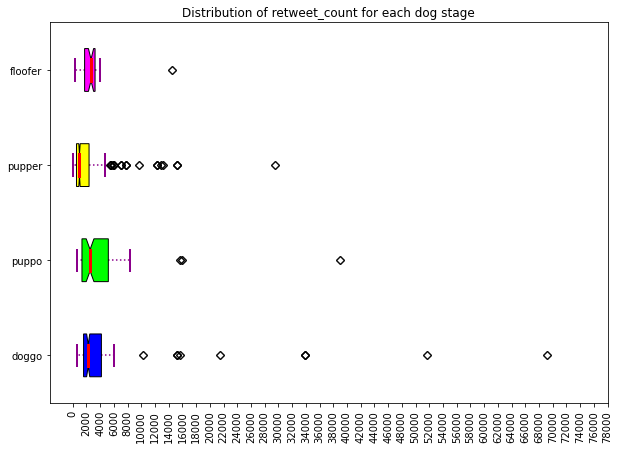

In [132]:
SumBoxPlots('retweet_count', 80000, 2000)

* **floofer** dog stage has a larger average of retweet_count(about 4000)
* for floofer dog stage, retweet_count max is 4000 (retweet_count average is 4000)
* for pupper dog stage, retweet_count max is 5000 (retweet_count average is 1000)
* for puppo dog stage, retweet_count max is 9000 (retweet_count average is 3000)
* for doggo dog stage, retweet_count max is 6000 (retweet_count average is 3000)

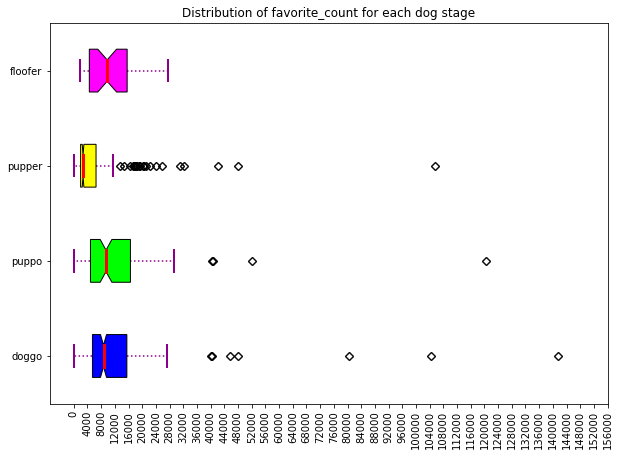

In [133]:
SumBoxPlots('favorite_count', 160000, 4000)

* **floofer** and **puppo** dog stages has a larger average of favorite_count(about 10000)
* for floofer dog stage, favorite_count max is 26000 (favorite_count average is 10000)
* for pupper dog stage, favorite_count max is 12000 (favorite_count average is 2000)
* for puppo dog stage, favorite_count max is 28000 (favorite_count average is 10000)
* for doggo dog stage, favorite_count max is 28000 (favorite_count average is 8000)

### Description of rating_numerator and rating_denominator per dog stage

Function to plot box plots for distributions of rating numerator and rating Denominator

In [134]:
def SumBoxPlots2(param):
    doggo_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(doggo_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 0, doggo_count, param)
    puppo_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(puppo_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 1, puppo_count, param)
    pupper_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(pupper_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 2, pupper_count, param)
    floofer_count = twitter_archive_master[twitter_archive_master['tweet_id'].isin(floofer_tweet_id)]['{}'.format(param)].to_numpy()
    AppendValue(multipleStage_tweet, 3, floofer_count, param)
    data = [doggo_count, puppo_count, pupper_count, floofer_count]
    def box_plot(data):
        fig = plt.figure(figsize =(10, 7))
        ax = fig.add_subplot(111)
 
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
        colors = ['#0000FF', '#00FF00',
              '#FFFF00', '#FF00FF']
 
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
 
        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                linewidth = 2)
 
        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color ='red',
               linewidth = 3)
 
        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.5)
     
        # x-axis labels
        ax.set_yticklabels(['doggo', 'puppo',
                    'pupper', 'floofer'])
 
        # Adding title
        plt.title("Distribution of {} for each dog stage".format(param))
 
        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
     
        # show plot
        xticks = np.arange(1, 30)
        plt.xticks(xticks, xticks)
        plt.show()
    box_plot(data)

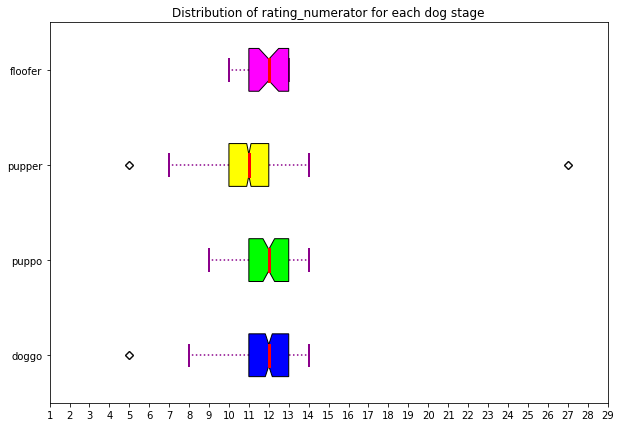

In [135]:
SumBoxPlots2('rating_numerator')

* for floofer dog stage, rating numerator min is 10 and rating numerator max is 13(rating numerator average is 12) 
* for pupper dog stage, rating numerator min is 7 and rating numerator max is 14(rating numerator average is 11)
* for doggo dog stage, rating numerator min is 8 and rating numerator max is 14(rating numerator average is 12)
* for puppo dog stage, rating numerator min is 9 and rating numerator max is 14(rating numerator average is 13)

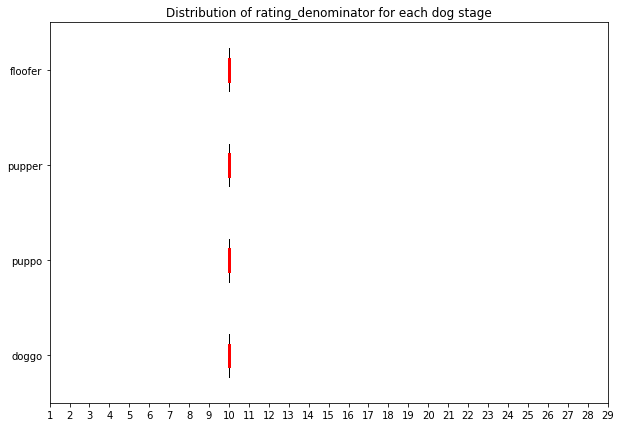

In [136]:
SumBoxPlots2('rating_denominator')

**rating_denominator** is always equal to 10.0

### Insights:
1. Predictive model **p1** is more reliable

2. **pupper** dog stage is more predominant

3. **puppo** dog stage has a greater spread of the whole tweet, and a greater spread in the middle 50 % of tweet in retweet_count and favorite_count distributions

4. **floofer** dog stage has a larger average of retweet_count(about 4000) and favorite_count(about 10000)

5. **puppo** and **floofer** dog stage have a larger average of ratings(13.0/10.0)